  Order_ID     Menu_Item  Price_USD  Quantity Time_of_Day Day_of_Week  \
0  ORD1000  Filet-O-Fish       3.30         4   Breakfast      Friday   
1  ORD1001      McFlurry       7.53         1       Lunch      Monday   
2  ORD1002  Cheeseburger       6.34         4   Breakfast     Tuesday   
3  ORD1003          Coke       1.92         1       Lunch   Wednesday   
4  ORD1004  Filet-O-Fish       9.27         3   Breakfast      Sunday   

   Is_Promo_Applied  Customer_Age Customer_Gender  
0                 0            67            Male  
1                 0            46          Female  
2                 1            24           Other  
3                 0            53          Female  
4                 0            29          Female  
Mean Squared Error: 0.01


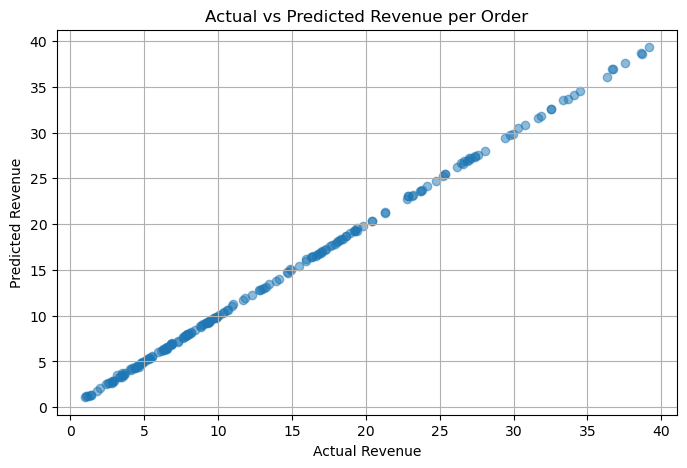

In [3]:
#Step 1: load the data
import pandas as pd
df = pd.read_csv("mcdonalds_orders_dataset.csv")
print(df.head())

#Step 2: Data Preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Encode categorical columns
df_encoded = df.copy()
label_cols = ["Menu_Item", "Time_of_Day", "Day_of_Week", "Customer_Gender"]
le = LabelEncoder()
for col in label_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])

# Define features and target (predict total revenue per order)
df_encoded['Total_Revenue'] = df_encoded['Price_USD'] * df_encoded['Quantity']
X = df_encoded.drop(columns=["Order_ID", "Total_Revenue"])
y = df_encoded["Total_Revenue"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Step 3: Train a Model
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

#Step 4: Visualize Results
import matplotlib.pyplot as plt
# Compare actual vs predicted
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Revenue")
plt.ylabel("Predicted Revenue")
plt.title("Actual vs Predicted Revenue per Order")
plt.grid(True)
plt.show()

  Order_ID Country  Menu_Item  Price_USD  Quantity Order_Time
0  ORD1000   Japan   McFlurry       4.33         2     Dinner
1  ORD1001  France  McChicken      10.11         2      Lunch
2  ORD1002  France       Coke      11.99         1      Lunch
3  ORD1003     USA   McFlurry       3.72         2  Breakfast
4  ORD1004  Brazil    Big Mac       4.28         2     Dinner
Country
USA            15
Australia      14
Canada         14
Japan          10
France          9
UK              8
Germany         8
India           8
Brazil          7
South Korea     7
Name: count, dtype: int64


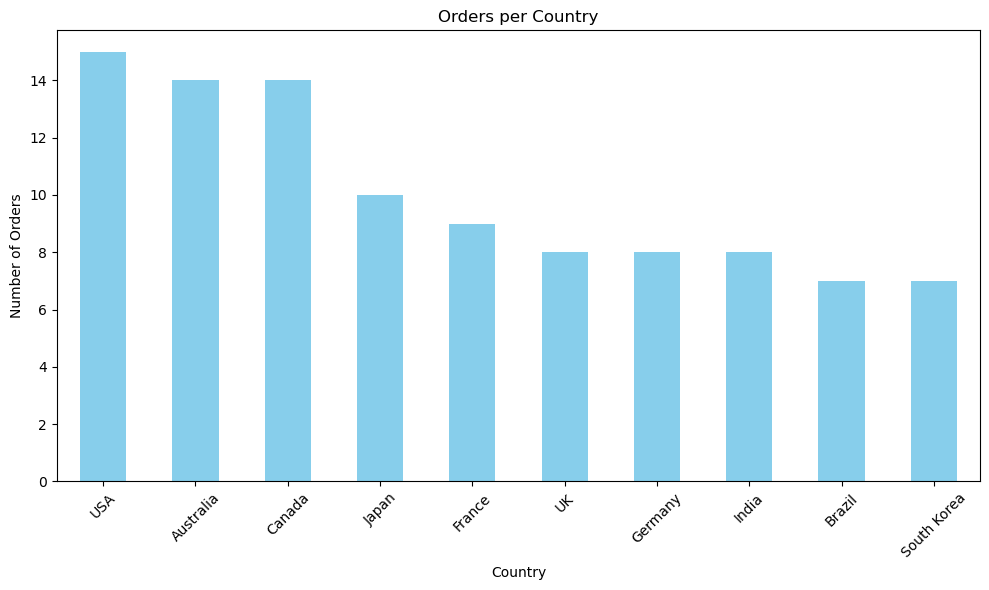

In [5]:
import pandas as pd

df = pd.read_csv("mcdonalds_country_orders.csv")
print(df.head())


# Count orders per country
country_counts = df["Country"].value_counts()
print(country_counts)



import matplotlib.pyplot as plt

country_counts.plot(kind='bar', figsize=(10, 6), title="Orders per Country", color='skyblue')
plt.xlabel("Country")
plt.ylabel("Number of Orders")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [11]:
#Bonus: Predicting High-Order Countries (Classification Model)

df["Order_Count"] = df["Country"].map(df["Country"].value_counts())
df["High_Order_Country"] = (df["Order_Count"] > df["Order_Count"].mean()).astype(int)


#Encode features and run a model:
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Encode categorical features
df_encoded = df.copy()
le = LabelEncoder()
for col in ["Country", "Menu_Item", "Order_Time"]:
    df_encoded[col] = le.fit_transform(df_encoded[col])

X = df_encoded[["Country", "Menu_Item", "Price_USD", "Quantity", "Order_Time"]]
y = df_encoded["High_Order_Country"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96        13
           1       0.88      1.00      0.93         7

    accuracy                           0.95        20
   macro avg       0.94      0.96      0.95        20
weighted avg       0.96      0.95      0.95        20

